In [102]:
import pandas as pd
import matplotlib.pyplot as plt

data_file = '../output/log_reg_performance_data.csv'
stat_file = '../output/sample_size_data.csv'

sf = pd.read_csv(stat_file, index_col=0)

df = pd.read_csv(data_file, index_col=0)
df = pd.concat([df, sf.iloc[:, -3:]], axis=1)
column_mapping = {
        'File': 'File',
        'File size': 'File size (GB)',
        'Executor cores': 'Executor cores (qty)',
        'Executor memory': 'Executor memory (GB)',
        'Max cores': 'Max cores (qty)',
        'Data load time': 'Data load time (s)',
        'Training time': 'Training time (s)',
        'Evaluation time': 'Evaluation time (s)',
        'Overall exec time': 'Overall exec time (s)',
        'Model accuracy': 'Model accuracy (%)',
        'Original samples': 'Original samples (qty)',
        'Not null samples': 'Not null samples (qty)',
        'Top 25 samples': 'Top 25 samples (qty)'
    }

df = df.rename(columns=column_mapping)

desired_order = [
    'File',
    'File size (GB)',
    'Original samples (qty)',
    'Not null samples (qty)',
    'Top 25 samples (qty)',
    'Executor cores (qty)',
    'Executor memory (GB)',
    'Max cores (qty)',
    'Data load time (s)',
    'Training time (s)',
    'Evaluation time (s)',
    'Overall exec time (s)',
    'Model accuracy (%)'
]

df = df[desired_order]


In [105]:
df.T

,0,1,2,3,4
File,reddit_50k,reddit_100k,reddit_200k,reddit_500k,corpus-webis-tldr-17
File size (GB),0.365163,0.7303,1.456891,3.637079,18.272816
Original samples (qty),99999,200001,400001,1000001,3848330
Not null samples (qty),49817,99668,199278,498212,3848194
Top 25 samples (qty),24040,47829,96392,240448,1734553
Executor cores (qty),2,4,4,4,4
Executor memory (GB),2g,4g,4g,4g,4g
Max cores (qty),2,4,4,10,32
Data load time (s),10.837165,9.589758,13.542774,29.637732,104.006195
Training time (s),62.828886,28.736364,46.246853,232.311345,618.184387


In [92]:
df['Data load time per GB'] = df['Data load time (s)'] / df['File size (GB)']
df['Training time per sample'] = df['Training time (s)'] / df['Top 25 samples (qty)']
df['Evaluation time per sample'] = df['Evaluation time (s)'] / df['Top 25 samples (qty)']

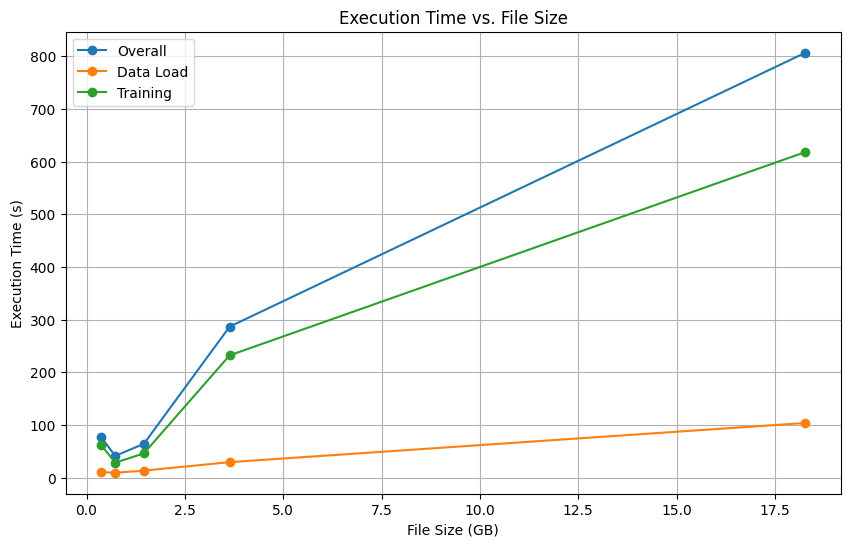

In [93]:
plt.figure(figsize=(10, 6))
plt.plot(df['File size (GB)'], df['Overall exec time (s)'], marker='o', label='Overall')
plt.plot(df['File size (GB)'], df['Data load time (s)'], marker='o', label='Data Load')
plt.plot(df['File size (GB)'], df['Training time (s)'], marker='o', label='Training')
plt.xlabel('File Size (GB)')
plt.ylabel('Execution Time (s)')
plt.title('Execution Time vs. File Size')
plt.legend()
plt.grid(True)
plt.show()

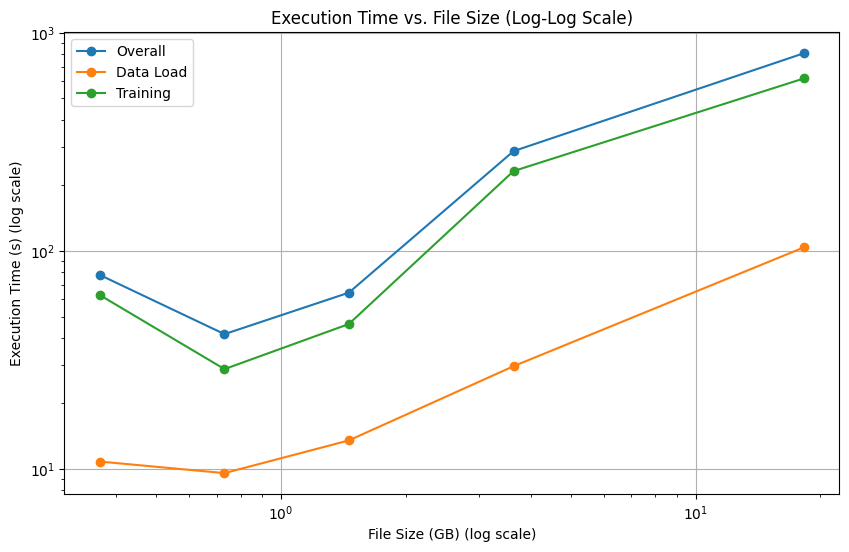

In [94]:
plt.figure(figsize=(10, 6))
plt.xscale('log')
plt.yscale('log')
plt.plot(df['File size (GB)'], df['Overall exec time (s)'], marker='o', label='Overall')
plt.plot(df['File size (GB)'], df['Data load time (s)'], marker='o', label='Data Load')
plt.plot(df['File size (GB)'], df['Training time (s)'], marker='o', label='Training')
plt.xlabel('File Size (GB) (log scale)')
plt.ylabel('Execution Time (s) (log scale)')
plt.title('Execution Time vs. File Size (Log-Log Scale)')
plt.legend()
plt.grid(True)
plt.show()

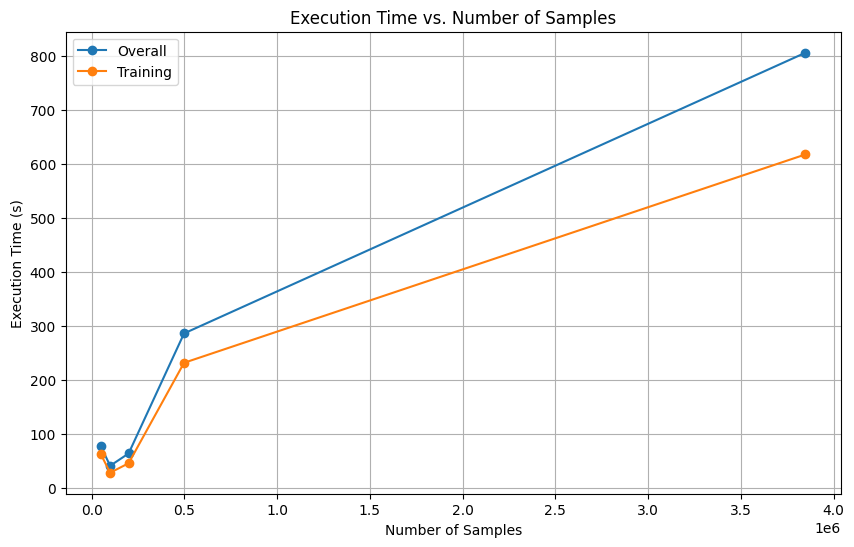

In [95]:
plt.figure(figsize=(10, 6))
plt.plot(df['Not null samples (qty)'], df['Overall exec time (s)'], marker='o', label='Overall')
plt.plot(df['Not null samples (qty)'], df['Training time (s)'], marker='o', label='Training')
plt.xlabel('Number of Samples')
plt.ylabel('Execution Time (s)')
plt.title('Execution Time vs. Number of Samples')
plt.legend()
plt.grid(True)
plt.show()

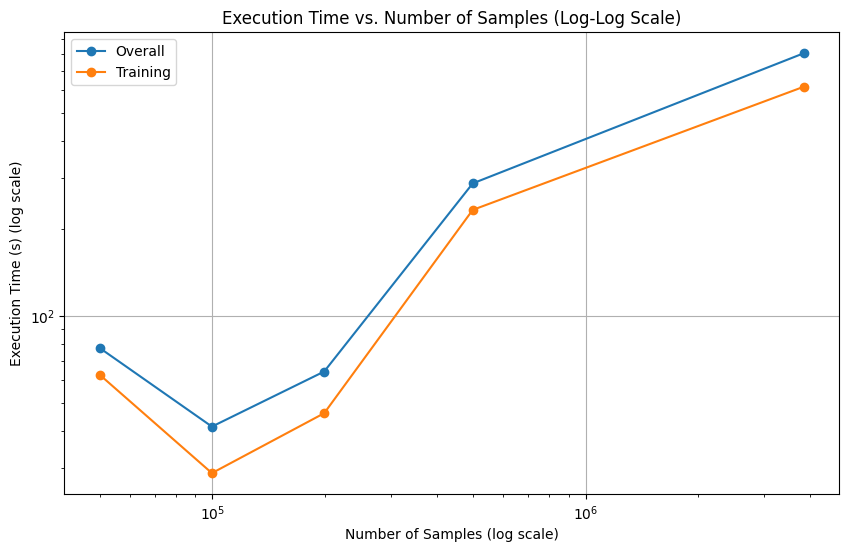

In [96]:
plt.figure(figsize=(10, 6))
plt.xscale('log')
plt.yscale('log')
plt.plot(df['Not null samples (qty)'], df['Overall exec time (s)'], marker='o', label='Overall')
plt.plot(df['Not null samples (qty)'], df['Training time (s)'], marker='o', label='Training')
plt.xlabel('Number of Samples (log scale)')
plt.ylabel('Execution Time (s) (log scale)')
plt.title('Execution Time vs. Number of Samples (Log-Log Scale)')
plt.legend()
plt.grid(True)
plt.show()

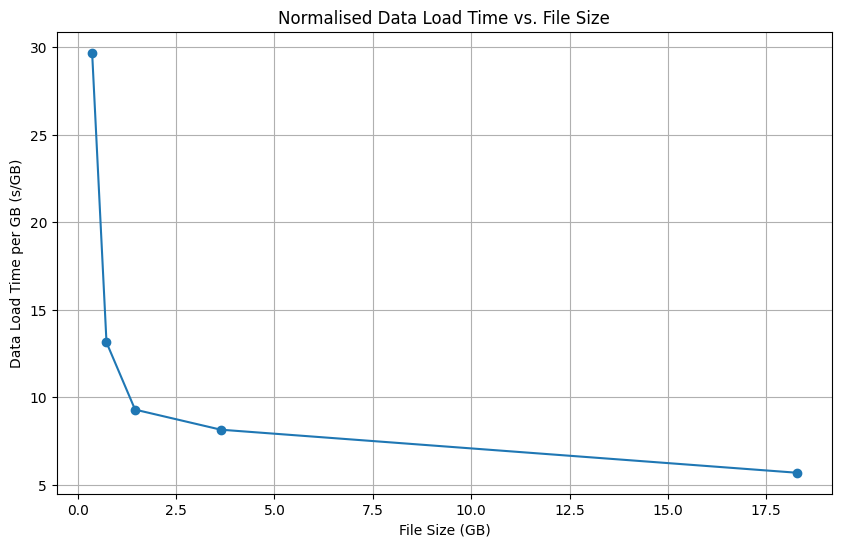

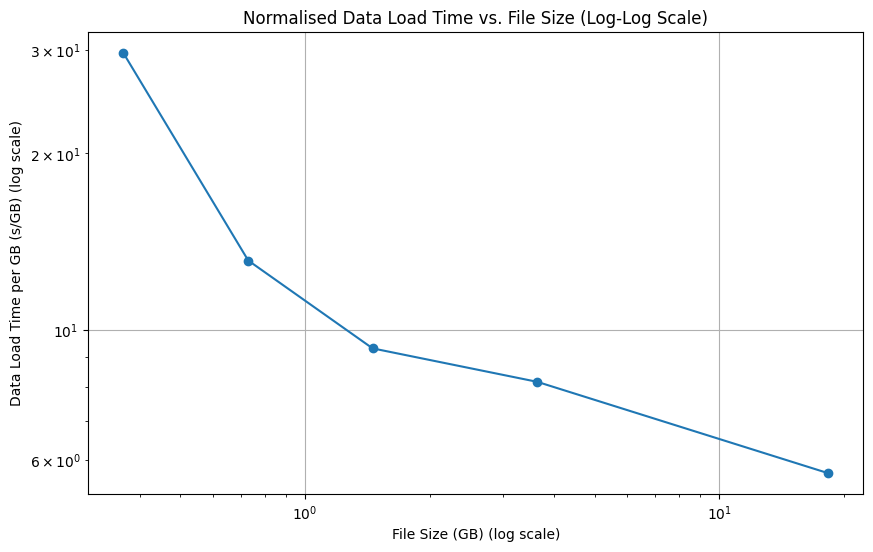

In [97]:
plt.figure(figsize=(10, 6))
plt.plot(df['File size (GB)'], df['Data load time per GB'], marker='o')
plt.xlabel('File Size (GB)')
plt.ylabel('Data Load Time per GB (s/GB)')
plt.title('Normalised Data Load Time vs. File Size')
plt.grid(True)
plt.show()

plt.figure(figsize=(10, 6))
plt.xscale('log')
plt.yscale('log')
plt.plot(df['File size (GB)'], df['Data load time per GB'], marker='o')
plt.xlabel('File Size (GB) (log scale)')
plt.ylabel('Data Load Time per GB (s/GB) (log scale)')
plt.title('Normalised Data Load Time vs. File Size (Log-Log Scale)')
plt.grid(True)
plt.show()

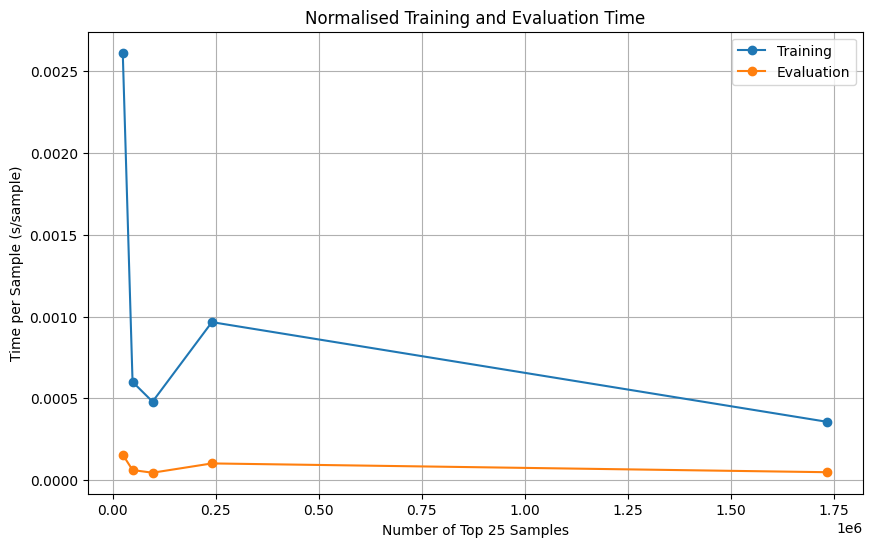

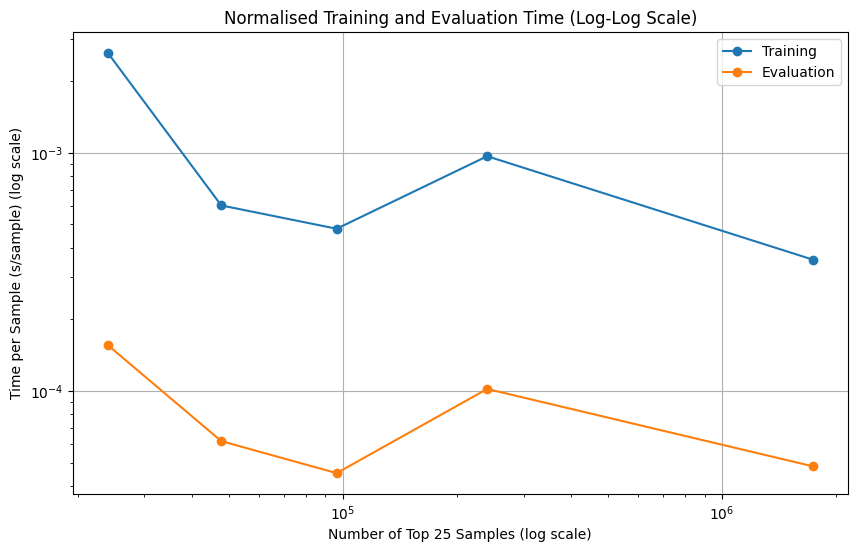

In [98]:
plt.figure(figsize=(10, 6))
plt.plot(df['Top 25 samples (qty)'], df['Training time per sample'], marker='o', label='Training')
plt.plot(df['Top 25 samples (qty)'], df['Evaluation time per sample'], marker='o', label='Evaluation')
plt.xlabel('Number of Top 25 Samples')
plt.ylabel('Time per Sample (s/sample)')
plt.title('Normalised Training and Evaluation Time')
plt.legend()
plt.grid(True)
plt.show()

plt.figure(figsize=(10, 6))
plt.xscale('log')
plt.yscale('log')
plt.yscale('log')
plt.plot(df['Top 25 samples (qty)'], df['Training time per sample'], marker='o', label='Training')
plt.plot(df['Top 25 samples (qty)'], df['Evaluation time per sample'], marker='o', label='Evaluation')
plt.xlabel('Number of Top 25 Samples (log scale)')
plt.ylabel('Time per Sample (s/sample) (log scale)')
plt.title('Normalised Training and Evaluation Time (Log-Log Scale)')
plt.legend()
plt.grid(True)
plt.show()

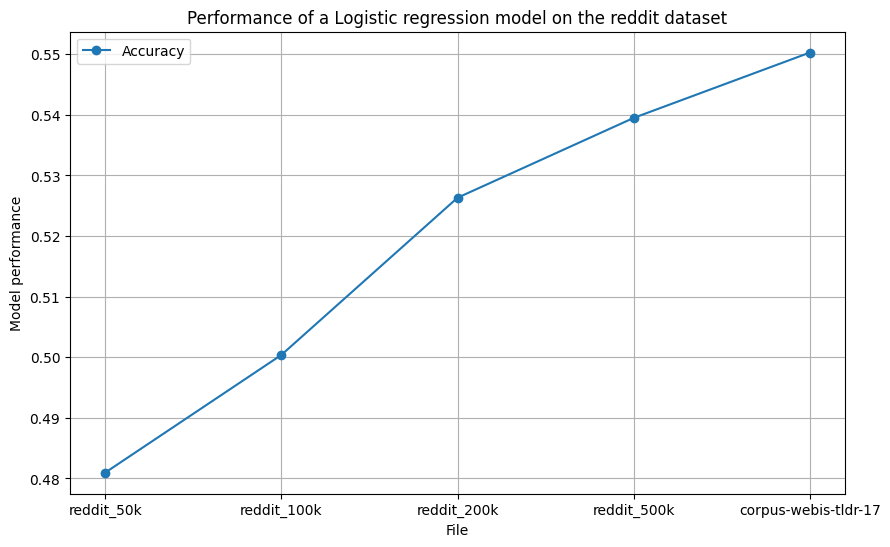

In [106]:
plt.figure(figsize=(10, 6))
plt.plot(df['File'], df['Model accuracy (%)'], marker='o', label='Accuracy')
plt.xlabel('File')
plt.ylabel('Model performance')
plt.title('Performance of a Logistic regression model on the reddit dataset')
plt.legend()
plt.grid(True)
plt.show()